# Creating final data for crop and fertilizer recommendation system

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fertilizer_data_path = '../Data-raw/FertilizerData.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [3]:
merge_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.5
1,1,maize,80,40,20,5.5
2,2,chickpea,40,60,80,5.5
3,3,kidneybeans,20,60,20,5.5
4,4,pigeonpeas,20,60,20,5.5


In [4]:
del merge_fert['Unnamed: 0']

In [5]:
merge_fert.describe()

,N,P,K,pH
count,22.000000,22.000000,22.000000,22.000000
mean,50.454545,45.681818,48.181818,5.409091
std,36.315715,32.634172,51.698426,0.590326
min,20.000000,10.000000,10.000000,4.000000
25%,20.000000,20.000000,20.000000,5.500000
50%,30.000000,40.000000,30.000000,5.500000
75%,80.000000,60.000000,50.000000,5.500000
max,120.000000,125.000000,200.000000,6.500000


In [6]:
merge_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

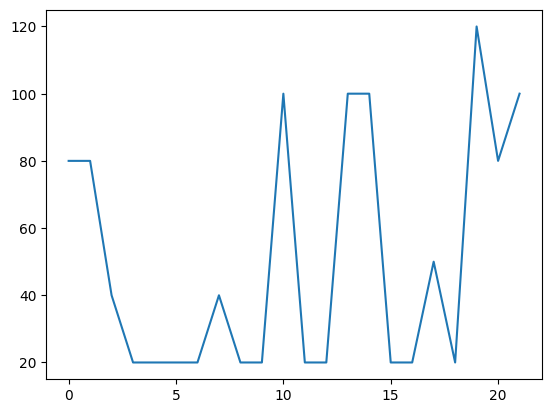

In [7]:
plt.plot(merge_fert["N"])

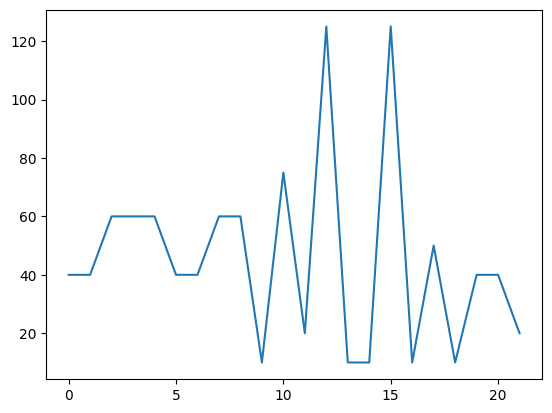

In [8]:
plt.plot(merge_fert["P"])

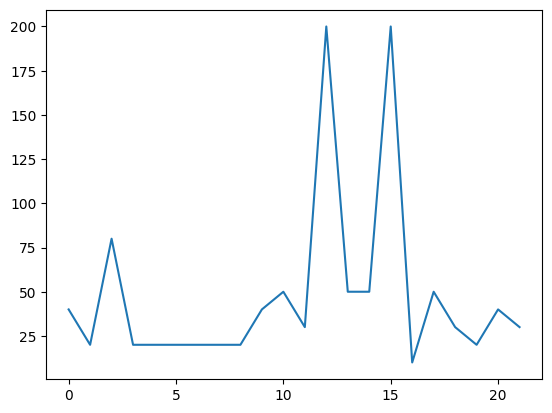

In [9]:
plt.plot(merge_fert["K"])

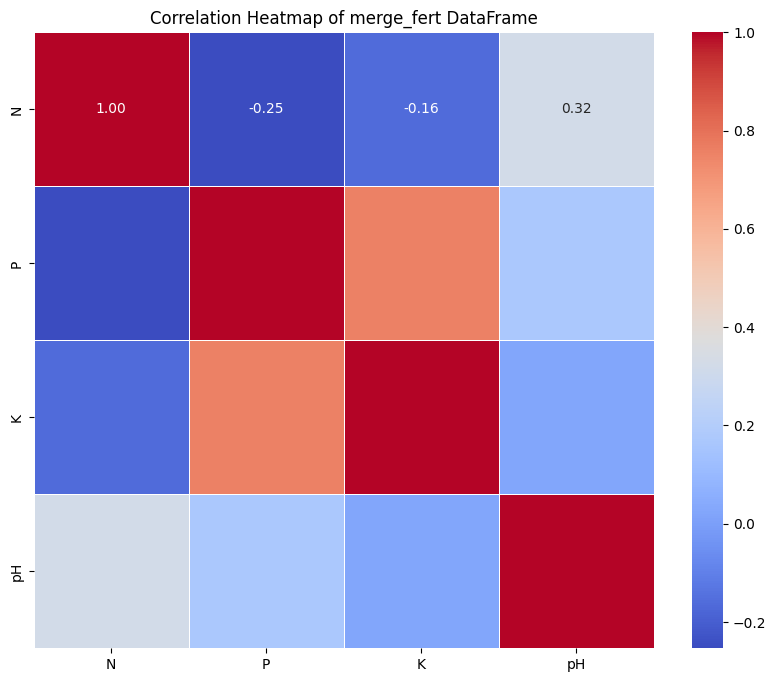

In [16]:
numeric_cols = merge_fert.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))  # Optional: Adjust the size of the heatmap
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of merge_fert DataFrame')
plt.show()

In [17]:
merge_crop = pd.read_csv('../Data-raw/MergeFileCrop.csv')
reco_fert = merge_fert

In [20]:
#Add +/-3 for every NPK value
import random
temp_list = []

for i in range(0, merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20, 20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5, 20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5, 5)
    
    # Append the data to the list
    temp_list.append({"N": N, "P": P, "K": K})

# Convert the list of dictionaries to a DataFrame
temp = pd.DataFrame(temp_list)

In [21]:
temp

,N,P,K
0,93,53,41
1,100,36,44
2,69,42,42
3,75,51,38
4,77,35,45
...,...,...,...
2195,105,22,26
2196,111,29,29
2197,115,39,32
2198,83,30,29


In [22]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [23]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,20.879744,82.002744,6.502985,202.935536,rice,93,53,41
1,1,21.770462,80.319644,7.038096,226.655537,rice,100,36,44
2,2,23.004459,82.320763,7.840207,263.964248,rice,69,42,42
3,3,26.491096,80.158363,6.980401,242.864034,rice,75,51,38
4,4,20.130175,81.604873,7.628473,262.717340,rice,77,35,45
...,...,...,...,...,...,...,...,...,...
2195,2195,26.774637,66.413269,6.780064,177.774507,coffee,105,22,26
2196,2196,27.417112,56.636362,6.086922,127.924610,coffee,111,29,29
2197,2197,24.131797,67.225123,6.362608,173.322839,coffee,115,39,32
2198,2198,26.272418,52.127394,6.758793,127.175293,coffee,83,30,29


In [24]:
del merge_crop['Unnamed: 0']

In [25]:
merge_crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,93,53,41
1,21.770462,80.319644,7.038096,226.655537,rice,100,36,44
2,23.004459,82.320763,7.840207,263.964248,rice,69,42,42
3,26.491096,80.158363,6.980401,242.864034,rice,75,51,38
4,20.130175,81.604873,7.628473,262.717340,rice,77,35,45
...,...,...,...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee,105,22,26
2196,27.417112,56.636362,6.086922,127.924610,coffee,111,29,29
2197,24.131797,67.225123,6.362608,173.322839,coffee,115,39,32
2198,26.272418,52.127394,6.758793,127.175293,coffee,83,30,29


In [26]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [27]:
merge_crop.to_csv("../Data-processed/crop_recommendation.csv",index=False)

In [28]:
# Checking if everything went fine
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [29]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,93,53,41,20.879744,82.002744,6.502985,202.935536,rice
1,100,36,44,21.770462,80.319644,7.038096,226.655537,rice
2,69,42,42,23.004459,82.320763,7.840207,263.964248,rice
3,75,51,38,26.491096,80.158363,6.980401,242.864034,rice
4,77,35,45,20.130175,81.604873,7.628473,262.717340,rice


In [30]:
df.shape

(2200, 8)